In [1]:
import nltk 
nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

%cd "/drive/MyDrive/TextMiningProject/"

Mounted at /drive
/drive/MyDrive/TextMiningProject


In [ ]:
!pip3 install --upgrade pandas

In [3]:
# !pip install tweet-preprocessor
!pip install sklearn
!pip install matplotlib
!pip install import_ipynb

!pip install pandas

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=ec83b6d3b028e50d052949a7f48b0e84c5112be61b6cdfefd1291e438d5dd27b
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [9]:
import sys
import os

py_file_location = "/drive/MyDrive/TextMiningProject/text-preprocessing-techniques"
sys.path.append(os.path.abspath(py_file_location))

In [10]:
import pandas as pd
import random
import seaborn as sn
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import GridSearchCV
#import preprocessor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
import import_ipynb
from Utilities import *
from preprocess import tokenize 

In [11]:
genuine_sample, ssb2, ssb3 = generate_data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [71]:
train_1, train_2, test_1, test_2 = generate_train_test(genuine_sample, ssb2, ssb3)


/drive/MyDrive/TextMiningProject/Utilities.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssb2_train["Label"] = "bot"
/drive/MyDrive/TextMiningProject/Utilities.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssb3_train["Label"] = "bot"
/drive/MyDrive/TextMiningProject/Utilities.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [67]:

report_values(train_1, train_2, test_1, test_2)

,SSB2 Train,SSB3 Train,SSB2 Test,SSB3 Test
genuine,586967,586967,251557,251557
bot,299755,39884,38521,17093


In [72]:
# Run this cell to downsample

train_1 = downsample(train_1)
train_2 = downsample(train_2)
test_1 = downsample(test_1)
test_2 = downsample(test_2)

# train_1 = downsample_prop(train_1, 0.5)
# train_2 = downsample_prop(train_2, 0.5)
# test_1 = downsample_prop(te<st_1, 0.5)
# test_2 = downsample_prop(test_2, 0.5)



In [15]:
report_values(train_1, train_2, test_1, test_2)

,SSB2 Train,SSB3 Train,SSB2 Test,SSB3 Test
bot,299755,39884,38521,17093
genuine,299755,39884,38521,17093


In [16]:
def tokenize_to_txt(df, output_name):
  text_array = df["text"].values.astype('U')
  
  with open("tokenized_" + output_name + ".txt", "a") as result:

    for tweet in text_array:
      tokenized = tokenize(tweet)
      tokenized_line = " ".join(tokenized)
      result.write(tokenized_line + "\n")

  
# tokenize_to_txt(genuine_sample, "genuine")
# tokenize_to_txt(ssb2, "ssb2")
# tokenize_to_txt(ssb3, "ssb3")

## Naive Bayes classifier

### SSB_2

In [17]:

pipe = Pipeline([('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])
pipe.fit(train_1["text"].values.astype('U'), train_1["Label"])


Pipeline(steps=[('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])

In [18]:
print(classification_report(test_1["Label"], pipe.predict(test_1["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.79      0.83      0.81     38521
     genuine       0.82      0.79      0.80     38521

    accuracy                           0.81     77042
   macro avg       0.81      0.81      0.81     77042
weighted avg       0.81      0.81      0.81     77042



In [19]:
cm = confusion_matrix(test_1["Label"], pipe.predict(test_1["text"].values.astype('U')), normalize="true")

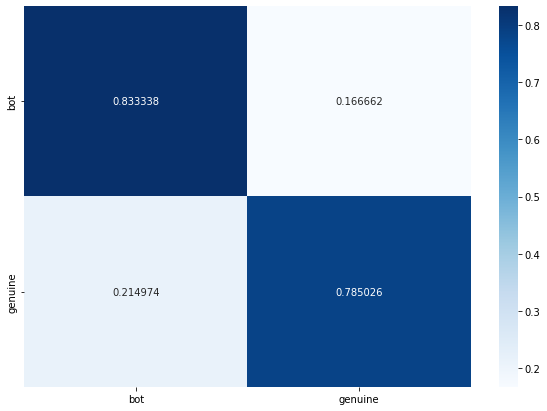

In [20]:
plot_confusion_matrix_custom(cm)

### SSB_3

In [21]:
pipe = Pipeline([('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])


In [22]:

pipe.fit(train_2["text"].values.astype('U'), train_2["Label"])


Pipeline(steps=[('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])

In [23]:
print(classification_report(test_2["Label"], pipe.predict(test_2["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.87      0.97      0.92     17093
     genuine       0.97      0.85      0.91     17093

    accuracy                           0.91     34186
   macro avg       0.92      0.91      0.91     34186
weighted avg       0.92      0.91      0.91     34186



In [24]:
cm = confusion_matrix(test_2["Label"], pipe.predict(test_2["text"].values.astype('U')), normalize="true")

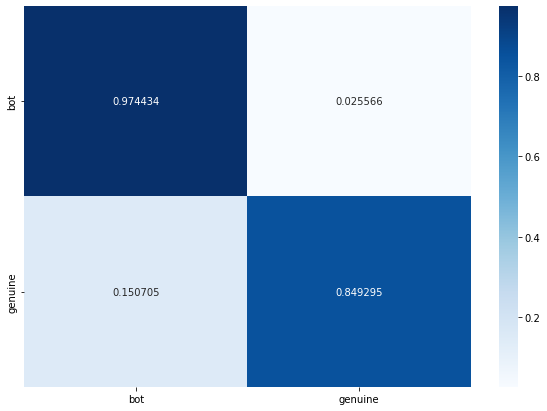

In [25]:
plot_confusion_matrix_custom(cm)

## Baselines

## Dummy Classifier

## SSB_2

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier


dummy = Pipeline([('vectorize ', CountVectorizer()), ('dummy', DummyClassifier(strategy = 'stratified'))])

dummy.fit(train_1["text"].values.astype('U'), train_1["Label"])

print(classification_report(test_1["Label"], dummy.predict(test_1["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.50      0.50      0.50     38521
     genuine       0.50      0.50      0.50     38521

    accuracy                           0.50     77042
   macro avg       0.50      0.50      0.50     77042
weighted avg       0.50      0.50      0.50     77042



In [27]:
cm = confusion_matrix(test_1["Label"], dummy.predict(test_1["text"].values.astype('U')))

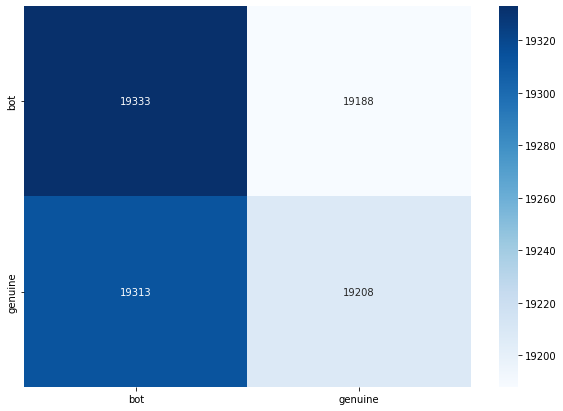

In [28]:
plot_confusion_matrix_custom(cm)

## SBB_3

In [29]:


dummy = Pipeline([('vectorize ', CountVectorizer()), ('dummy', DummyClassifier(strategy = 'stratified'))])

dummy.fit(train_2["text"].values.astype('U'), train_2["Label"])

print(classification_report(test_2["Label"], dummy.predict(test_2["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.50      0.50      0.50     17093
     genuine       0.50      0.50      0.50     17093

    accuracy                           0.50     34186
   macro avg       0.50      0.50      0.50     34186
weighted avg       0.50      0.50      0.50     34186



In [30]:
cm = confusion_matrix(test_2["Label"], dummy.predict(test_2["text"].values.astype('U')), normalize="true")

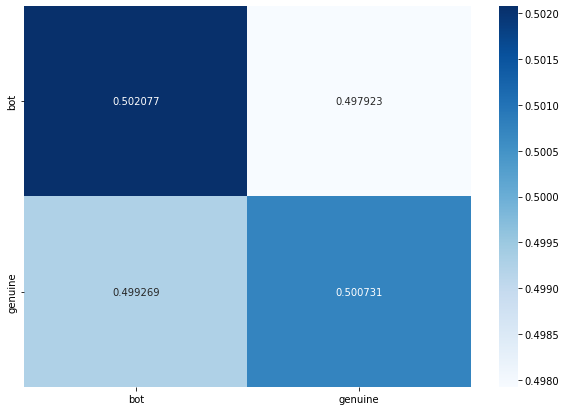

In [31]:
plot_confusion_matrix_custom(cm)

## Grid Search with NB classifier

In [73]:
for i in range(9):
  train_1 = downsample_prop(train_1, 0.5)
  test_1 = downsample_prop(test_1, 0.5)

for i in range(6):

  test_2 = downsample_prop(test_2, 0.5)
  train_2 = downsample_prop(train_2, 0.5)

train_1 = downsample(train_1)
train_2 = downsample(train_2)
test_1 = downsample(test_1)
test_2 = downsample(test_2)

report_values(train_1, train_2, test_1, test_2)

,SSB2 Train,SSB3 Train,SSB2 Test,SSB3 Test
bot,575,606,73,266
genuine,575,606,73,266


## SSB2

In [74]:
# how to change scoring? 

parameters = {'vectorize __binary':(True, False), 'vectorize __ngram_range':[(1,1), (1,2)], "MNB__alpha" : (1,0.1) }

clf = GridSearchCV(pipe, parameters, scoring = "f1_weighted", cv = 5, refit = True, verbose=2, n_jobs=-1)
clf.fit(train_1["text"].values.astype('U'), train_1["Label"])
print(classification_report(test_1["Label"], clf.predict(test_1["text"].values.astype('U'))))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

         bot       0.65      0.77      0.70        73
     genuine       0.72      0.59      0.65        73

    accuracy                           0.68       146
   macro avg       0.68      0.68      0.68       146
weighted avg       0.68      0.68      0.68       146



In [75]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer(binary=True)),
                ('MNB', MultinomialNB(alpha=1))])

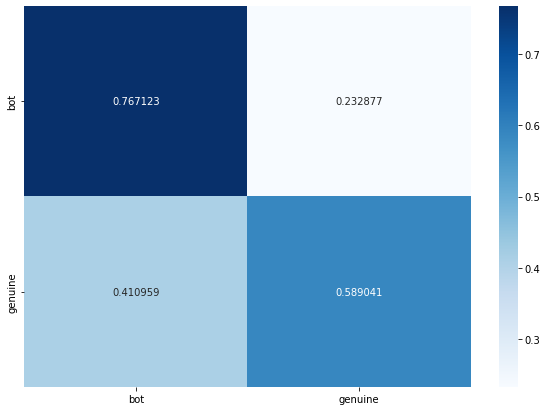

In [76]:
cm = confusion_matrix(test_1["Label"], clf.predict(test_1["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## SSB3

In [77]:

parameters = {'vectorize __binary':(True, False), 'vectorize __ngram_range':[(1,1), (1,2)], "MNB__alpha" : (1,0.1) }

clf = GridSearchCV(pipe, parameters, scoring = "f1_weighted", cv = 5, refit = True, verbose=2, n_jobs=-1)
clf.fit(train_2["text"].values.astype('U'), train_2["Label"])
print(classification_report(test_2["Label"], clf.predict(test_2["text"].values.astype('U'))))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

         bot       0.70      0.89      0.78       266
     genuine       0.85      0.62      0.72       266

    accuracy                           0.76       532
   macro avg       0.77      0.76      0.75       532
weighted avg       0.77      0.76      0.75       532



In [78]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer(binary=True)),
                ('MNB', MultinomialNB(alpha=0.1))])

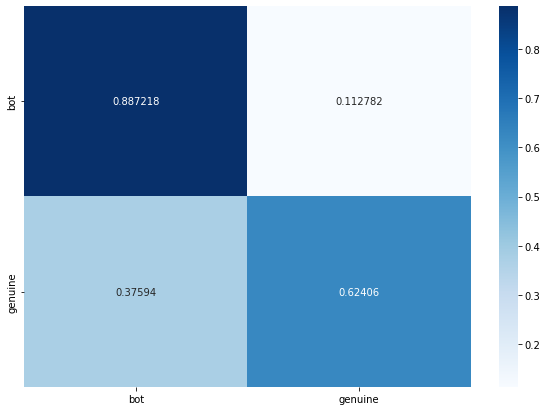

In [79]:
cm = confusion_matrix(test_2["Label"], clf.predict(test_2["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## Grid Search with Logistic regression 

## SSB2

In [80]:
from sklearn.linear_model import LogisticRegression

GBC = Pipeline([('vectorize ', CountVectorizer()), ('LG', LogisticRegression(solver='liblinear'))])

parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "LG__C" : [0.1, 0.5, 1]}

#scor = {"F1": "f1"}


clf = GridSearchCV(GBC, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train_1["text"].values.astype('U'), train_1["Label"])
print(classification_report(test_1["Label"], clf.predict(test_1["text"].values.astype('U'))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.69      0.62      0.65        73
     genuine       0.65      0.73      0.69        73

    accuracy                           0.67       146
   macro avg       0.67      0.67      0.67       146
weighted avg       0.67      0.67      0.67       146



In [81]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer()),
                ('LG', LogisticRegression(C=1, solver='liblinear'))])

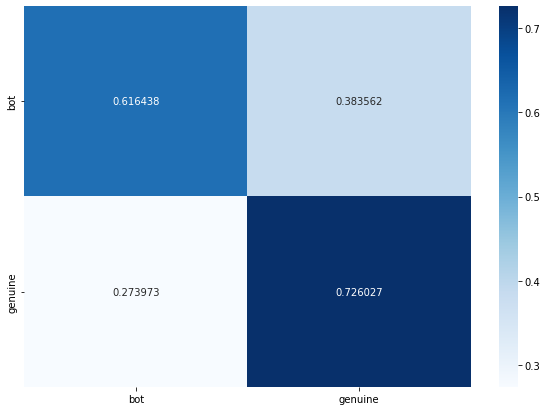

In [82]:
cm = confusion_matrix(test_1["Label"], clf.predict(test_1["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## SSB3

In [83]:
from sklearn.linear_model import LogisticRegression

GBC = Pipeline([('vectorize ', CountVectorizer()), ('LG', LogisticRegression(solver='liblinear'))])

parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "LG__C" : [0.1, 0.5, 1]}

#scor = {"F1": "f1"}


clf = GridSearchCV(GBC, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train_2["text"].values.astype('U'), train_2["Label"])
print(classification_report(test_2["Label"], clf.predict(test_2["text"].values.astype('U'))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.84      0.83      0.84       266
     genuine       0.84      0.84      0.84       266

    accuracy                           0.84       532
   macro avg       0.84      0.84      0.84       532
weighted avg       0.84      0.84      0.84       532



In [84]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer()),
                ('LG', LogisticRegression(C=1, solver='liblinear'))])

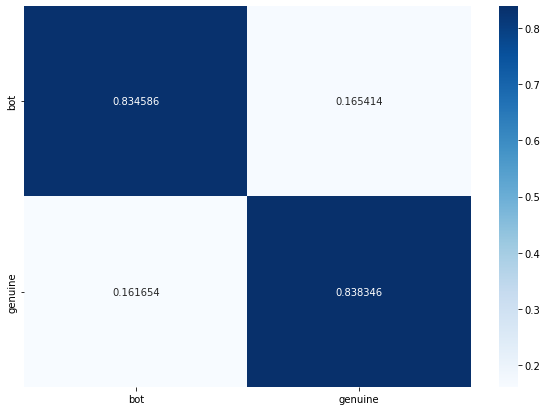

In [85]:
cm = confusion_matrix(test_2["Label"], clf.predict(test_2["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## Grid Search with Decision Trees 

## SSB2

In [86]:
from sklearn.tree import DecisionTreeClassifier

DT = Pipeline([('vectorize ', CountVectorizer()), ('DT', DecisionTreeClassifier())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "DT__max_depth" : [30, 60, 120]}



clf = GridSearchCV(DT, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train_1["text"].values.astype('U'), train_1["Label"])
print(classification_report(test_1["Label"], clf.predict(test_1["text"].values.astype('U'))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.75      0.60      0.67        73
     genuine       0.67      0.79      0.72        73

    accuracy                           0.70       146
   macro avg       0.71      0.70      0.70       146
weighted avg       0.71      0.70      0.70       146



In [87]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer(ngram_range=(1, 2))),
                ('DT', DecisionTreeClassifier(max_depth=120))])

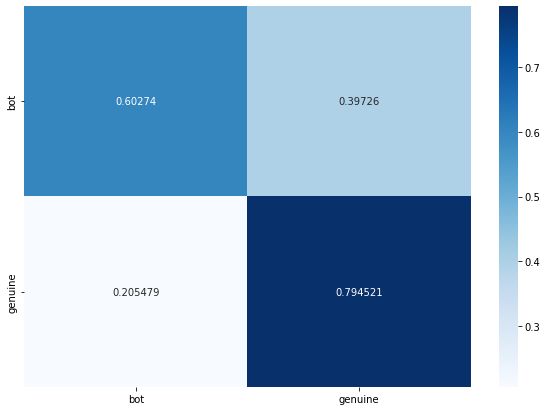

In [88]:
cm = confusion_matrix(test_1["Label"], clf.predict(test_1["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## SSB3

In [89]:
from sklearn.tree import DecisionTreeClassifier

DT = Pipeline([('vectorize ', CountVectorizer()), ('DT', DecisionTreeClassifier())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "DT__max_depth" : [30, 60, 120]}



clf = GridSearchCV(DT, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train_2["text"].values.astype('U'), train_2["Label"])
print(classification_report(test_2["Label"], clf.predict(test_2["text"].values.astype('U'))))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.79      0.76      0.77       266
     genuine       0.76      0.79      0.78       266

    accuracy                           0.77       532
   macro avg       0.77      0.77      0.77       532
weighted avg       0.77      0.77      0.77       532



In [90]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer()),
                ('DT', DecisionTreeClassifier(max_depth=60))])

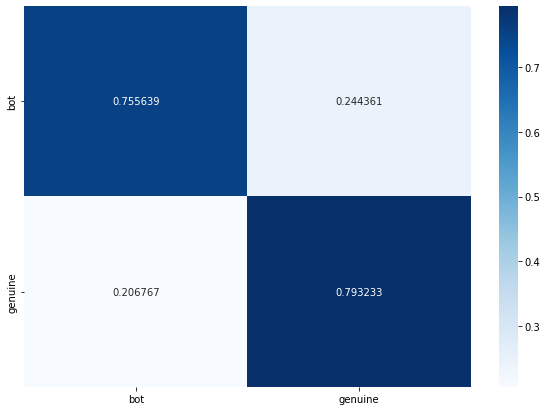

In [91]:
cm = confusion_matrix(test_2["Label"], clf.predict(test_2["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## Grid Search with Support vector Machines

##SSB2

In [92]:
param_grid = {'C': [10, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}

from sklearn.svm import SVC

SVC = Pipeline([('vectorize ', CountVectorizer()), ('SVC', SVC())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "SVC__C" : param_grid['C'], 'SVC__gamma': param_grid['gamma'], 'SVC__kernel': param_grid['kernel'] }



clf = GridSearchCV(SVC, parameters, cv = 4, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)

clf.fit(train_1["text"].values.astype('U'), train_1["Label"])

print(classification_report(test_1["Label"], clf.predict(test_1["text"].values.astype('U'))))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
              precision    recall  f1-score   support

         bot       0.70      0.58      0.63        73
     genuine       0.64      0.75      0.69        73

    accuracy                           0.66       146
   macro avg       0.67      0.66      0.66       146
weighted avg       0.67      0.66      0.66       146



In [93]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer(ngram_range=(1, 2))),
                ('SVC', SVC(C=1000, gamma=0.0001))])

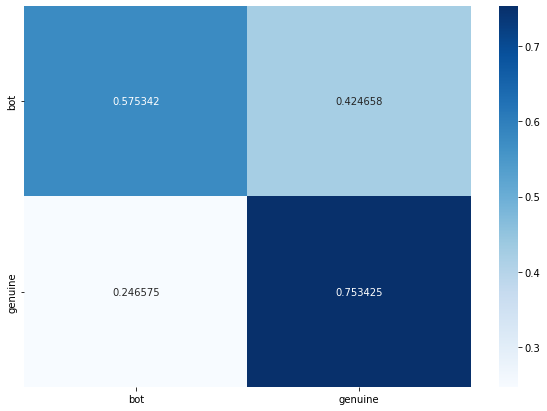

In [94]:
cm = confusion_matrix(test_1["Label"], clf.predict(test_1["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

##SSB3

In [95]:
param_grid = {'C': [100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}

from sklearn.svm import SVC

SVC = Pipeline([('vectorize ', CountVectorizer()), ('SVC', SVC())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "SVC__C" : param_grid['C'], 'SVC__gamma': param_grid['gamma'], 'SVC__kernel': param_grid['kernel'] }



clf = GridSearchCV(SVC, parameters, cv = 4, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)

clf.fit(train_2["text"].values.astype('U'), train_2["Label"])

print(classification_report(test_2["Label"], clf.predict(test_2["text"].values.astype('U'))))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
              precision    recall  f1-score   support

         bot       0.84      0.81      0.82       266
     genuine       0.82      0.84      0.83       266

    accuracy                           0.83       532
   macro avg       0.83      0.83      0.83       532
weighted avg       0.83      0.83      0.83       532



In [96]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer()),
                ('SVC', SVC(C=1000, gamma=0.0001))])

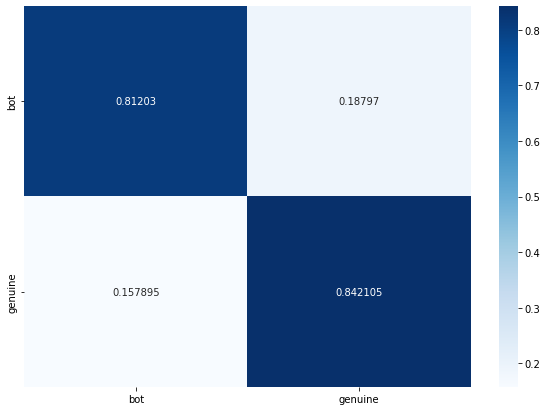

In [97]:
cm = confusion_matrix(test_2["Label"], clf.predict(test_2["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)